## Week6

* 중간고사 시험 공지
    * 대면으로 시험
    * 문제 당일 공개 x. 손코딩

## 지난 주 week5 복습

In [ ]:
# import nltk
# nltk.download() #출력결과 구구단에 활용하기
# lookup eroor나오는 경우에는 a 옵션 실행

In [3]:
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\panom\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\panom\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

### 1. Conditional Frequency distribution

In [ ]:
#cfd #이 코드는 외워야함
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) #categories 쓰기, fileids가 있으므로
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)
#conditions -> all genre 모든 장르 / samples -> modals 조동사를 기준으로
#출력값 : 모든 장르에 대해 modals의 빈도수가 등장함.

In [3]:
#modals의 빈도수가 포함된 cfd (word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may']
    for word in brown.words(categories=genre)     # genre랑 modal만 있으면 둘의 연관관계가 없어서 연관관계를 만들어줌
        # word 중 modal이 포함된 것만 추출
        if word.lower() == modal) #word.lower()여서 위와 결과물이 다르게 출력됨
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


* .plot()
* .tabulate()

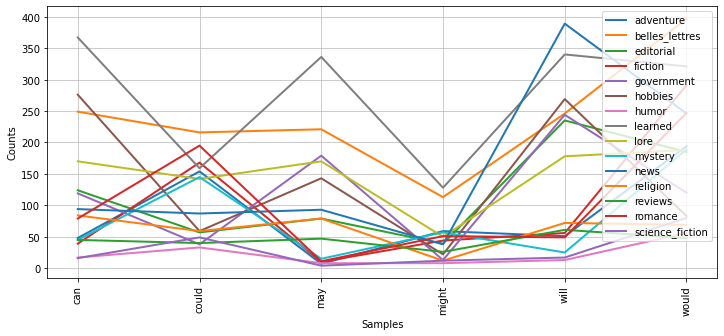

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
# !pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

cfd1.plot()

### 2. Inaugural
* 연설문 코퍼스

In [5]:
# import는 동일하게
inaugural = nltk.corpus.inaugural

In [ ]:
#inaugural에는 fileids()만 있음

inaugural.fileids()

#출력결과 : 연도-이름.txt | '2021-Biden.txt'

In [ ]:
#파일 출력해보기

# inaugural.raw(fileids='2017-Trump.txt')

#### citizen이 각 대통령 별로 얼마나 많이 사용되었는가를 알아 볼 것임

#### `Quiz` : ['america', 'citizen'] 빈도수를 cfd로 만드시오.

In [7]:
# citizen, citizen's, .. 여러 형태 모두 포함
# gerne라는 말이 헷갈리니 fileid로 

cfd2 = nltk.ConditionalFreqDist(
    (fileid[:-4], target_word)  #[:-4]로 .txt 제외 #위치 바꾸면 x,y축 변경됨
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']

    for word in inaugural.words(fileids=fileid)
        # if target_word in word.lower()
        # if word.lower().startwith(target_word)
        if word.lower() == target_word
)

cfd2.tabulate()              #x,y축 바뀌었을 때 객체 이름 너무 길어서 표가 안 이쁘게 나옴

                america citizen 
1793-Washington       1       0 
     1797-Adams       5       1 
    1817-Monroe       0       5 
    1821-Monroe       2       0 
     1825-Adams       0       1 
  1837-VanBuren       1       1 
  1841-Harrison       0      11 
    1853-Pierce       0       1 
  1857-Buchanan       1       0 
   1861-Lincoln       0       1 
     1869-Grant       0       2 
     1873-Grant       0       1 
     1877-Hayes       0       1 
  1881-Garfield       1       2 
 1885-Cleveland       0       5 
  1889-Harrison       0       3 
 1893-Cleveland       0       3 
      1909-Taft       4       0 
    1917-Wilson       2       0 
   1921-Harding      15       0 
  1925-Coolidge       8       2 
    1929-Hoover       6       2 
 1937-Roosevelt       1       1 
 1941-Roosevelt       7       1 
 1945-Roosevelt       1       0 
1953-Eisenhower       3       3 
1957-Eisenhower       5       0 
   1961-Kennedy       2       0 
   1965-Johnson       3       3 
     1969-

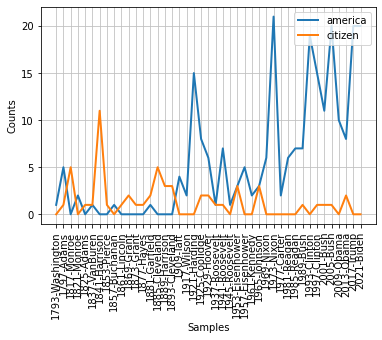

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
#plot()이 깔끔하게 나옴
cfd2.plot()

### Ch.07 Tuple & List
- `Tuple`
     * 불변 객체
     * 변하지 않는 데이터 시퀀스를 만들 수 있다.
     * 타인의 접근 막는다.
         * ex) blue=1, white=2, ...
     * 메모리 사용 적다.
- `list`
    * 가변 객체
    * 튜플 장점 필요없을 때 전부 리스트 사용
    * 데이터를 순차적으로 파악할 때
    * 중복 데이터를 쓸 수 있다는 점 vs. set함

- 둘은 유사함.
- 주로 리스트를 쓰되, 불변이 필요한 경우 튜플을 사용

### 1. 생성

In [20]:
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

#### 1.1 요소 여러 개일 때

In [23]:
alphabetT = ('a', 'b')
alphabetT = 'a', 'b' #이렇게 해도 튜플로 됨
alphabetT

alphabetL = ['a', 'b']
alphabetT, alphabetL

(('a', 'b'), ['a', 'b'])

#### 1.2 요소 1개일 때 주의할 점

In [28]:
 #요소가 1개일 때 ()를 해줘도 자료형이 tuple로 변하지 않음

alphaT = ('a') #str
type(alphaT), alphaT

(str, 'a')

In [27]:
#이럴 때는 ()와 ,를 활용

alphaT = ('a',)
type(alphaT), alphaT

(tuple, ('a',))

### 2. packing vs unpacking

- `packing` : 한 변수에 여러 데이터를 할당하는 것.
    - list, tuple 자체를 의미함
    - a = [1, 2, 3, 4]
- `unpacking` : 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것

#### * unpacking

In [8]:
a, b, c = 'win'
a, b, c

('w', 'i', 'n')

#### * 튜플 값 교환하기

In [27]:
pwd = '1234'
userID = 'ocellow'

#원래는 이렇게 했음
"""temp1 = userID
temp2 = pwd
pwd = temp1
userID = temp2"""

#python은 교환 그냥 가능
pwd, userID = userID, pwd
pwd, userID #출력해보면 값 교환된거 확인 가능

('ocellow', '1234')

#### * 튜플의 덧셈

In [29]:
('a',) + (1, 2)

('a', 1, 2)

#### * 튜플의 곱셈

In [31]:
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

#### * 튜플은 형 변환이 안된다고 했는데 어떻게 값이 달라지는가?
* x+y를 하면 새로운 변수의 아이디가 나옴
* 튜플이 변한게 아님

In [12]:
x = ('a',)
y = (1, 2)
id(x), id(x + y)

(1532850672400, 1532850246784)

#### * 튜플의 비교

In [33]:
x = 1, 2
y = 1, 6

#비교를 할 때는 첫 인자부터 비교.
x < y

True

#### * tuple의 순회

In [14]:
for i in x :
    print(x)

(1, 2)
(1, 2)


#### * tuple comprehension은?
* 없어요
* 대신 list comprehension을 형변환 할 수 있음

In [35]:
#방법 1
[i for i in x]

#방법 2
tuple([i for i in x])

#방법 3_ *와 ,로 만듦
*[i for i in x],  #얘가 더 느림

(1, 2)

#### * 튜플의 형변환

In [37]:
dog = 'dog'

#방법 1
tuple(dog) #각 인자를 하나씩 돌면서 따로 만듦.

('d', 'o', 'g')

In [20]:
#방법 2
dogT = tuple(dog)

dogT

('d', 'o', 'g')

In [22]:
#방법 3
(dog,)

('dog',)

#### * 리스트와 비교해보기

In [38]:
list(dog)

['d', 'o', 'g']

#### * 튜플의 슬라이싱
* tuple은 순회가 가능하기 때문에 slicing도 동일하게 가능하다.

In [39]:
dogT[0]

'd'

### 3. 리스트의 유용한 함수들
* 변경, 삭제, 추가, 
* 리스트컴프리헨션 업그레이드

### <생성, 추가>

In [43]:
a = list('cake')
a
#cake가 자동으로 분리되어 리스트화 됨

['c', 'a', 'k', 'e']

`range()`

In [65]:
# 위의 내용을 활용해서 range로 숫자 리스트 만들 수 있음
num = list(range(10))
num

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

`.append()` : 리스트에 원소 추가
* 마지막에 요소를 1개 추가함
* 여러개 추가는 불가능함
    * ex) num.append(4, 5, 6)

In [68]:
# 마지막에 요소 1개 추가
num.append('end')
print(num)

#리스트를 요소로 추가 가능
add = [1, 2, 3]
num.append(add)
print(num)

# 여러개 추가는 불가능 #요소 여러개를 append로 추가 불가
# num.append(4, 5, 6) 
# 에러남

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'end', [1, 2, 3], 'end']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'end', [1, 2, 3], 'end', [1, 2, 3]]


`insert(index, item)` : 특정 위치에 원소 삽입

In [62]:
num.insert(5, 'middle')
num

[0, 1, 2, 3, 4, 'middle', 5, 6, 7, 8, 9, 'end']

`extend()` : 리스트에 여러개 추가
* 리스트를 리스트로 확장함

In [63]:
num.extend([0, 0, 0])
num

[0, 1, 2, 3, 4, 'middle', 5, 6, 7, 8, 9, 'end', 0, 0, 0]

In [64]:
#이렇게 추가해도 됨
x = [1, 2, 3]
num.extend(x)
num

[0, 1, 2, 3, 4, 'middle', 5, 6, 7, 8, 9, 'end', 0, 0, 0, 1, 2, 3]

In [69]:
# extend() 안쓰고 연산으로 추가 가능
num += x
num

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'end', [1, 2, 3], 'end', [1, 2, 3], 1, 2, 3]

### <변경, 삭제>
`offset`

In [92]:
a = [10, 9, 8, 7, 6, 6, 6, 6]
print(a)

a[0] = 9
print(a)

[10, 9, 8, 7, 6, 6, 6, 6]
[9, 9, 8, 7, 6, 6, 6, 6]


`slice`

In [93]:
a[:3] = 2, 2, 2
a

[2, 2, 2, 7, 6, 6, 6, 6]

In [94]:
# 주의 : string 넣으면 unpacking 되어 append 됨
a[:3] = 'god'
a

['g', 'o', 'd', 7, 6, 6, 6, 6]

`del` : 삭제

In [95]:
del a[:3]
a

[7, 6, 6, 6, 6]

`remove(value)`

In [96]:
print(a)
a.remove(6)
print(a)

[7, 6, 6, 6, 6]
[7, 6, 6, 6]


`pop(index)`
* 기본값 : -1
* 가장 앞의 값을 꺼내옴

In [97]:
print(a)
a.pop()
print(a)

[7, 6, 6, 6]
[7, 6, 6]


In [98]:
a.pop(0)
a

[6, 6]

`clear()` : list 내용 지우기

In [99]:
a.clear()
a

[]

### <탐색>

`index()` : 인덱스 찾기

In [102]:
num = list(range(5))

# 0번째 인덱스 반환
num.index(0)

0

`in` : 특정 요소가 존재하는지 파악

In [103]:
0 in num

True

### <정렬>
`.sort()`
* 리스트.sort()

In [106]:
num.sort(reverse=True) #값을 할당하지 않아도 된다.
num

[4, 3, 2, 1, 0]

 `sorted()`

In [107]:
sorted(num, reverse=True) #변한 값만 복사해서 출력

[4, 3, 2, 1, 0]

### <순서 변경>
`reverse()`

In [115]:
num = [1,2,3,4,5]
num.reverse()
num

[5, 4, 3, 2, 1]

`reversed()`

In [116]:
#값 반환하지 않음
reversed(num)
print(reversed(num))

#이렇게 리스트로 값 만들어서 출력해줘야 함
print(list(reversed(num)))

[1, 2, 3, 4, 5]


### <참조/복사>
* 같은 메모리 주소 공유

In [118]:
# 1. a 할당
a = list(range(1, 5))
a

[1, 2, 3, 4]

In [120]:
# 2. b에 a의 메모리 주소를 참조시킴
b = a
print(a, b)

[1, 2, 3, 4] [1, 2, 3, 4]


In [122]:
# 3. b의 원소를 바꾸면 a의 원소도 변경됨
b[0] = 6
print(a, b)

[6, 2, 3, 4] [6, 2, 3, 4]


In [123]:
# 4. a,b의 메모리 주소를 확인해보면 똑같음
id(a), id(b)

(1532851501952, 1532851501952)

`.copy` : shallow copy / 얕은 복사
* 참조하지 않고 새로운 객체에 할당하는 방법

In [128]:
a = [1,2,3,4]

#방법 1 _ list.copy()
c = a.copy()
#방법 2 _ list(list)
d = list(a)
#방법 3 _ list[:]
e = a[:]

id(a), id(c), id(d), id(e) #모두 다른 list가 됨

(1532851185472, 1532851509184, 1532851273088, 1532851308480)

In [129]:
# 얕은 복사의 문제점
# 리스트 내 요소가 가변객체일 때, 얕은 복사를 하면 그 요소를 변경했을 때 같이 변경됨
a.append([10,11,12])
a

[1, 2, 3, 4, [10, 11, 12]]

In [130]:
#f를 통해 알아보자

#1. f에 a를 copy해줌
f = a.copy()
print(a, f)

#2. a와 f의 객체 주소는 다름
print(id(a), id(f))

#3. f의 가변객체 요소를 변경했더니 a도 변경됨
f[-1][0] = 9
print(a, f)

[1, 2, 3, 4, [10, 11, 12]] [1, 2, 3, 4, [10, 11, 12]]
1532851185472 1532851501888
[1, 2, 3, 4, [9, 11, 12]] [1, 2, 3, 4, [9, 11, 12]]


`deep copy` : 깊은 복사
* 하위에 중첩된 리스트 요소까지 바뀌지 않도록 복사

In [132]:
import copy

g = copy.deepcopy(a)
print('a :', a)
print('g :', g)

a : [1, 2, 3, 4, [9, 11, 12]]
g : [1, 2, 3, 4, [9, 11, 12]]


In [135]:
#a를 변경해도 g까지 바뀌지 않음!
a.append([1, 2, 3])
print('a :', a)
print('g :', g)

a : [1, 2, 3, 4, [9, 11, 12], [1, 2, 3], [1, 2, 3]]
g : [1, 2, 3, 4, [10, 11, 12]]


In [136]:
#g를 변경해도 a가 바뀌지 않음.
g[-1][0] = 10
print('a :', a)
print('g :', g)

a : [1, 2, 3, 4, [9, 11, 12], [1, 2, 3], [1, 2, 3]]
g : [1, 2, 3, 4, [10, 11, 12]]


### <순회>
`zip()`

In [153]:
name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

#(name, age)
for item1, item2 in zip(name, age):
    print(item1, item2)

kate 77
royce 44
phill 54


In [143]:
#중첩 for문과 다름. 동시에 순회하지 못함
for item1 in name:
    for item2 in age:
        print((item1, item2))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [144]:
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

`enumerate()`

In [145]:
# 리스트 + 인덱스 enumerate
for idx,item in enumerate(name) :
    print(idx, item)

0 kate
1 royce
2 phill


### List Comprehension

In [147]:
#리스트 컴프리헨션으로 바꾸기
[word for word in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [149]:
nameList = ['kate', 'royce', 'phill']
ageList = [77, 44, 54]

[(name, age) for name, age in zip(nameList, ageList)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [150]:
#리스트 컴프리헨션 아닌 방법
people = []
for name, age in zip(nameList, ageList):
    people.append((name, age))
    
print(people)

[('kate', 77), ('royce', 44), ('phill', 54)]


In [ ]:
# name, age를 이용해서 새로운 리스트를 생성하는데 (이름, 나이)

new_list = []
for i,j in zip(name,age):
    new_list.append((i,j)) #append 사용
print(new_list)

`Quiz 1` : for문의 리스트 컴프리헨션 바꾸기

In [154]:
# 문제
for i in name:
    for j in age:
        print((i, j))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [155]:
# 정답
[(i,j) for j in age for i in name]

[('kate', 77),
 ('royce', 77),
 ('phill', 77),
 ('kate', 44),
 ('royce', 44),
 ('phill', 44),
 ('kate', 54),
 ('royce', 54),
 ('phill', 54)]

`Quiz 2` : [i,j] 리스트의 리스트로 바꿔보기 (리.컴)

* 원하는 출력결과
[ [('kate', 77), ('royce', 77), ('phill', 77)],  
[('kate', 44), ('royce', 44), ('phill', 44)],  
[('kate', 54), ('royce', 54), ('phill', 54)] ] 

In [156]:
output = []
for i in name:
    empty = []
    for j in age:
        print(i, j)
        empty.append((i, j))
    output.append(output)

kate 77
kate 44
kate 54
royce 77
royce 44
royce 54
phill 77
phill 44
phill 54


In [157]:
[[(i, j) for j in age] for i in name]

[[('kate', 77), ('kate', 44), ('kate', 54)],
 [('royce', 77), ('royce', 44), ('royce', 54)],
 [('phill', 77), ('phill', 44), ('phill', 54)]]

`Quiz 3`
* sentence = "do not judge a book by its cover"
* [ (대문자, 첫글자 대문자, 글자수), ... ] 리스트 만들기

In [158]:
sentence = "do not judge a book by its cover"
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

`Quiz 4`
* text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother']
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

#1. 문장마다 스트링으로 변화해서 리스트로 변환
    #['문장1', '문장2']
    
#2. 전체를 스트링으로 반환
    # '문장1 문장2'
    
#3. 전체 단어 리스트로 가져오기
    # [sunja, said, goodnight, ...]

In [ ]:
#1번 답
[' '.join(sent) for sent in text]

In [ ]:
#2번 답
' '.join([' '.join(sent) for sent in text])

In [ ]:
#3번 답
[word for sent in text for word in sent]

In [160]:
# if문 - else : 조건식을 앞으로 끌고 옴

[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [159]:
#짝수면 가져오고, 홀수면 '홀수'
[i if i%2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

#### brown corpus - romance 정제하기
romance = brown.raw(categories = 'romance')

* eclass에 답 제출완료